In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [276]:
gdp_df = pd.read_csv("./data/gapminder_final.csv")

## 1. Entendimiento de Datos

In [277]:
gdp_df.shape

(178, 16)

In [278]:
gdp_df.sample(10)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
168,El Salvador,2557.433638,3.99,1.321155,13.6,1.435867e+08,44.799999,0.80,15.899982,72.196,NaN,8.0,256.099151,7.304886,58.200001,60.70
153,Philippines,1383.401869,6.08,0.388067,46.6,2.008116e+09,46.799999,0.06,24.999946,68.749,0.140466,8.0,179.615181,1.922485,61.000000,64.92
99,Peru,3180.430612,6.53,1.435633,35.1,1.146277e+09,59.799999,0.40,34.300604,73.990,0.288893,9.0,239.389457,1.658908,68.300003,71.40
34,Gabon,4180.765821,9.46,1.018906,18.2,1.708043e+08,52.599998,5.20,7.232224,62.703,NaN,3.0,537.104738,7.745065,59.000000,85.04
173,Mexico,6105.280743,8.55,0.612340,26.4,1.330450e+10,39.599998,0.30,31.050013,76.954,0.770567,8.0,431.625379,4.288574,57.900002,77.20
158,Bhutan,1324.194906,0.54,NaN,21.8,6.024333e+06,39.900002,0.20,13.598876,67.185,NaN,3.0,NaN,15.542603,58.400002,34.48
105,Ukraine,1036.830725,17.47,0.931169,39.9,5.584766e+09,49.400002,1.10,44.585355,68.494,0.255235,7.0,673.584861,18.954570,54.400002,67.98
144,Jordan,2534.000380,0.65,5.909699,33.0,3.773037e+08,13.000000,NaN,38.881202,73.403,NaN,-3.0,719.476530,0.201449,38.900002,78.42
69,Malta,11066.784140,4.10,1.144319,76.1,7.378433e+07,30.100000,0.10,63.077993,79.634,NaN,NaN,1598.673959,4.551121,46.799999,94.26
65,Russia,2923.144355,16.23,1.941446,38.8,2.340457e+10,53.799999,1.00,43.366498,68.823,1.032470,4.0,825.941111,27.874160,58.799999,72.84


In [279]:
gdp_df.dtypes

country                  object
incomeperperson         float64
alcconsumption          float64
armedforcesrate         float64
breastcancerper100th    float64
co2emissions            float64
femaleemployrate        float64
hivrate                 float64
internetuserate         float64
lifeexpectancy          float64
oilperperson            float64
polityscore             float64
relectricperperson      float64
suicideper100th         float64
employrate              float64
urbanrate               float64
dtype: object

##### Para efectos de este análisis, nos enfocaremos en determinar el efecto sobre el PIB de las siguientes métricas:
1. <b>employrate</b>: Tasa de empleo. Porcentaje de población de 15 o más años de edad que, al año 2007, reportaron tener empleo durante el año.
2. <b>urbanrate</b>: Tasa de urbanidad. Porcentaje de población que reside en áreas urbanas.
3. <b>co2emissions</b>: Emisión acumulada de CO<sub>2</sub> desde el año 1751 hasta el año 2006, medida en toneladas.
4. <b>internetuserate</b>: Tasa de usuarios de internet cada 100 habitantes.
5. <b>lifeexpectancy</b>: Expectativa de vida al nacer, en años, para el año 2011.

In [280]:
features = ['employrate','urbanrate','co2emissions','internetuserate','lifeexpectancy']

#### 1.1. Tasa de empleo

In [281]:
gdp_df['employrate'].describe()

count    177.000000
mean      58.854237
std       10.334804
min       34.900002
25%       51.400002
50%       58.799999
75%       65.000000
max       83.199997
Name: employrate, dtype: float64

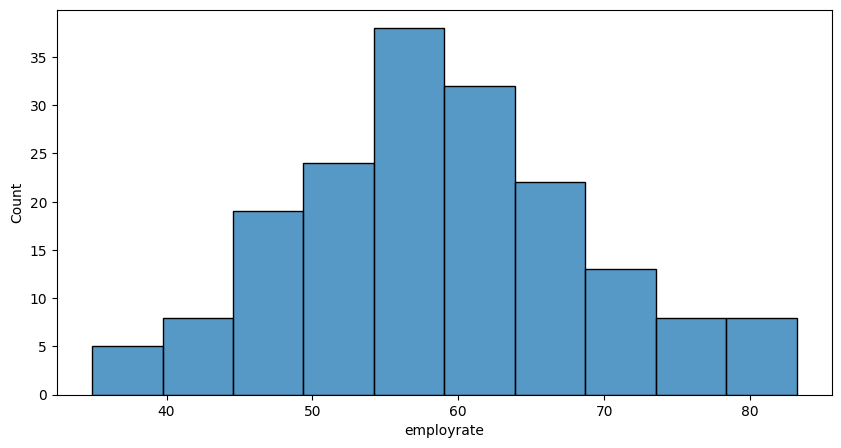

In [282]:
plt.figure(figsize=(10, 5))
sns.histplot(data=gdp_df['employrate'])
plt.show()

Para la variable de la tasa de empleo, podemos ver que sigue una distribución normal, con una media de 58.85% y una mediana bastante cercana a esta media, de 58.79%. Sin embargo, el hallazgo más importante es que no existen <i>outliers</i> demasiado marcados en esta característica, lo que facilitará su preparación antes de entrenar nuestro modelo.

#### 1.2. Tasa de urbanidad

In [283]:
gdp_df['urbanrate'].describe()

count    178.000000
mean      56.282135
std       22.561796
min       10.400000
25%       36.965000
50%       59.600000
75%       73.460000
max      100.000000
Name: urbanrate, dtype: float64

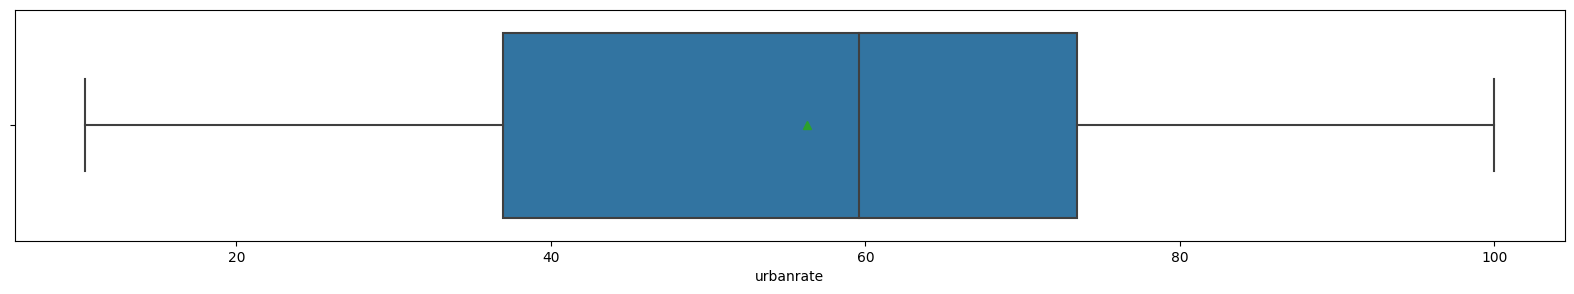

In [284]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=gdp_df['urbanrate'], showmeans=True, orient="h")
plt.show()

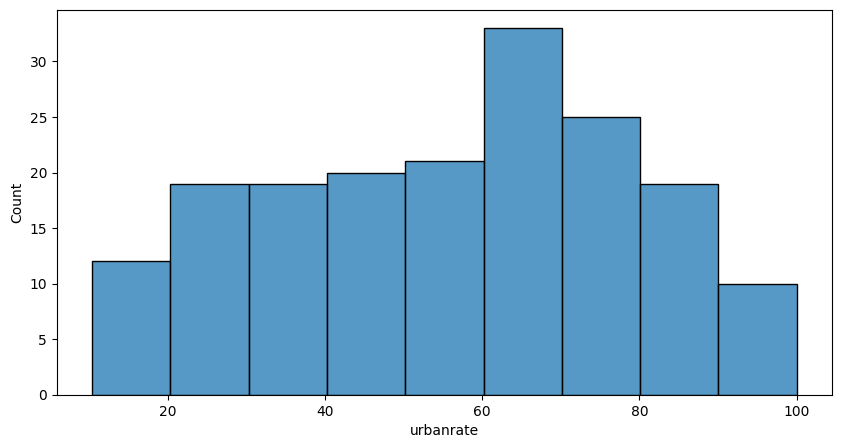

In [285]:
plt.figure(figsize=(10, 5))
sns.histplot(data=gdp_df['urbanrate'])
plt.show()

De manera similar, la métrica de tasa de urbanidad también presenta una distribución semejante a la normalidad, con un ligero sesgo hacia valores más bajos. La media se encuentra en 56.28%, con una mediana de 59.60%. De nuevo, para esta métrica en específico, tampoco existen <i>outliers</i>, lo que permitiría entrenar un modelo más robusto en caso de ser utilizada.

#### 1.3. Emisiones de CO<sub>2</sub> por persona

In [286]:
gdp_df['co2emissions'].describe()

count    1.760000e+02
mean     5.757754e+09
std      2.734690e+10
min      8.506667e+05
25%      8.755725e+07
50%      3.054792e+08
75%      2.391801e+09
max      3.340000e+11
Name: co2emissions, dtype: float64

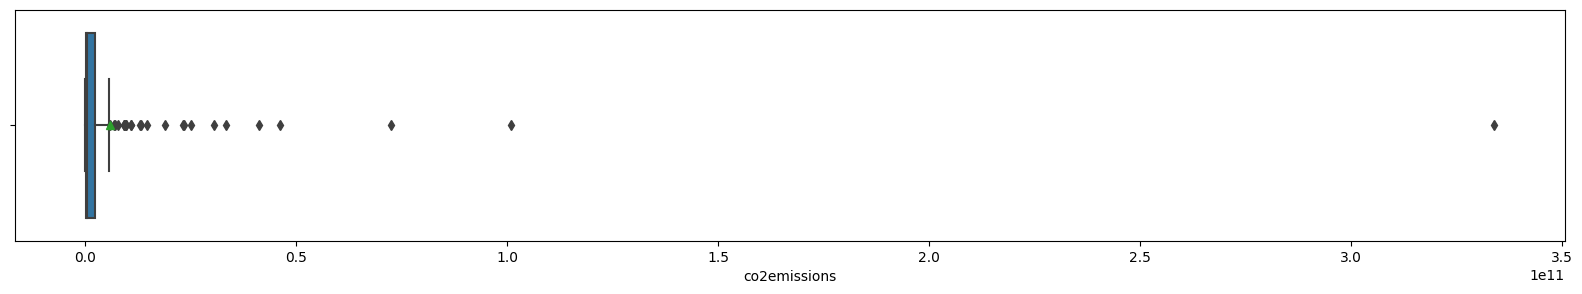

In [287]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=gdp_df['co2emissions'], showmeans=True, orient="h")
plt.show()

El análisis de esta variable puede llegar a ser un poco complicado, dada la altísima varianza que existe entre los valores (seis órdenes de magnitud entre el valor mínimo y el máximo) y esto podría llevar a considerar que los valores más grandes son <i>outliers</i>, cuando en realidad pueden estar asociados a países con economías altamente productivas

Revisemos a qué paises corresponden estos valores más altos para determinar si realmente son outliers o deben ser considerados dentro del análisis:

In [288]:
gdp_co2_outliers_df = gdp_df.loc[gdp_df["co2emissions"] >= gdp_df["co2emissions"].quantile(.90)]
gdp_co2_outliers_df.sort_values(by=["co2emissions"],ascending=False)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
177,United States,37491.179520,9.70,0.972378,101.1,3.340000e+11,56.000000,0.60,74.247572,78.531,2.738544,10.0,4542.848695,9.927033,62.299999,81.70
76,China,2425.471293,5.56,0.371357,18.7,1.010000e+11,68.900002,0.10,34.377790,73.456,0.319532,-7.0,331.376632,16.913248,72.800003,43.10
141,United Kingdom,28033.489280,13.24,0.508018,87.2,7.252425e+10,53.099998,0.20,84.731705,80.170,1.188028,10.0,1933.945615,6.014659,59.299999,89.94
42,Japan,39309.478860,7.79,0.361858,32.7,4.609221e+10,46.200001,0.06,77.638535,83.394,1.593223,10.0,2257.572233,18.946930,57.299999,66.48
73,Germany,25306.187190,12.14,0.575810,79.8,4.122955e+10,46.799999,0.10,82.526898,80.414,1.398500,10.0,1693.891898,9.211085,53.500000,73.64
110,France,22878.466570,12.48,1.233780,91.9,3.334163e+10,45.599998,0.40,77.498619,81.539,1.328291,9.0,2539.753273,14.091530,51.200001,77.36
94,India,786.700098,2.69,0.573920,19.1,3.039132e+10,32.299999,0.30,7.499996,65.438,0.126979,9.0,110.705466,18.583826,55.400002,29.54
170,Canada,25575.352620,10.20,0.342976,84.3,2.497905e+10,58.900002,0.20,81.338393,81.012,3.007356,10.0,4772.370648,10.100990,63.500000,80.40
65,Russia,2923.144355,16.23,1.941446,38.8,2.340457e+10,53.799999,1.00,43.366498,68.823,1.032470,4.0,825.941111,27.874160,58.799999,72.84
80,Poland,6575.745044,14.43,0.810187,50.3,2.305360e+10,42.099998,0.10,62.471230,76.126,0.687103,10.0,704.399752,13.637060,48.700001,61.32


In [289]:
gdp_sort_df = gdp_df.sort_values(by=["incomeperperson"],ascending=False)
gdp_sort_df.head(20)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
166,Luxembourg,52301.58718,12.84,0.731336,82.5,5.920127e+08,45.900002,0.30,90.079527,79.963,NaN,NaN,1566.106139,12.405918,53.500000,82.44
97,Luxembourg,52301.58718,12.84,0.731336,82.5,5.920127e+08,45.900002,0.30,90.079527,79.963,NaN,NaN,1566.106139,12.405918,53.500000,82.44
44,Norway,39972.35277,8.35,0.720528,74.8,1.962704e+09,60.900002,0.10,93.277508,81.097,2.191226,10.0,7432.130852,10.823000,65.000000,77.48
42,Japan,39309.47886,7.79,0.361858,32.7,4.609221e+10,46.200001,0.06,77.638535,83.394,1.593223,10.0,2257.572233,18.946930,57.299999,66.48
32,Switzerland,37662.75125,11.41,0.524220,81.7,2.406741e+09,57.000000,0.40,82.166660,82.338,1.487412,10.0,2361.033336,13.239810,64.300003,73.48
5,Switzerland,37662.75125,11.41,0.524220,81.7,2.406741e+09,57.000000,0.40,82.166660,82.338,1.487412,10.0,2361.033336,13.239810,64.300003,73.48
177,United States,37491.17952,9.70,0.972378,101.1,3.340000e+11,56.000000,0.60,74.247572,78.531,2.738544,10.0,4542.848695,9.927033,62.299999,81.70
81,Iceland,33945.31442,7.38,0.066100,90.0,9.277033e+07,69.599998,0.30,95.638113,81.804,NaN,NaN,2826.044873,11.426181,73.599998,92.26
160,Qatar,33931.83208,1.29,1.334236,33.3,8.119650e+08,39.599998,0.06,81.590397,78.371,4.207431,-10.0,4759.453844,2.515721,76.000000,95.64
117,Singapore,32535.83251,1.54,6.394936,48.7,1.548045e+09,51.299999,0.10,71.131707,81.126,12.228645,-2.0,1464.837281,9.127511,62.400002,100.00


Cómo se puede ver, los valores que pueden considerarse <i>outliers</i> desde el punto de vista completamente numérico, también corresponden a muchos de los países con PIB más alto, lo que nos servirá más adelante para evaluar la correlación entre esta variable y el PIB de los países.

#### 1.4. Tasa de usuarios de internet

In [290]:
gdp_df['internetuserate'].describe()

count    174.000000
mean      34.740125
std       28.088371
min        0.210066
25%        9.924668
50%       29.939930
75%       55.973228
max       95.638113
Name: internetuserate, dtype: float64

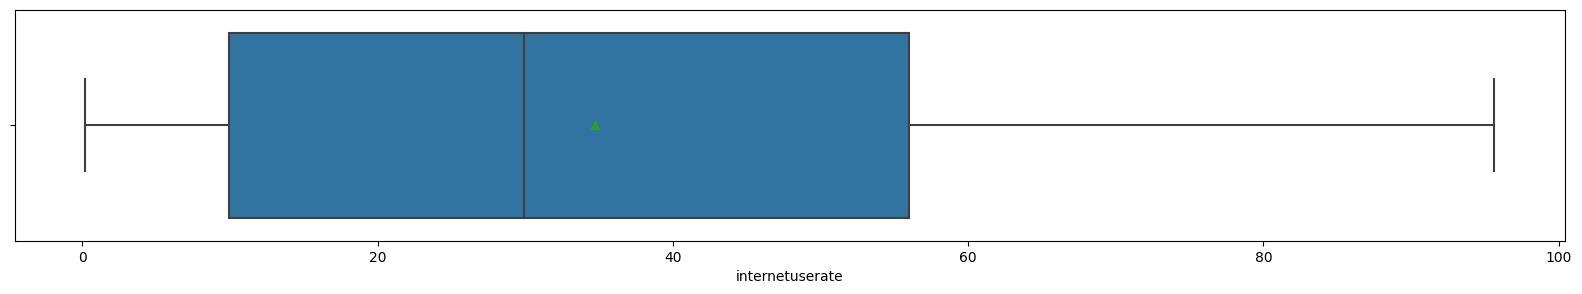

In [291]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=gdp_df['internetuserate'], showmeans=True, orient="h")
plt.show()

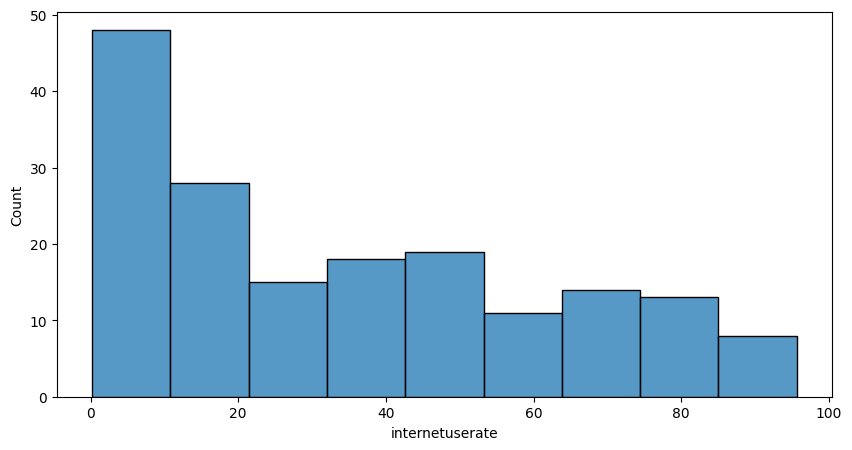

In [292]:
plt.figure(figsize=(10, 5))
sns.histplot(data=gdp_df['internetuserate'])
plt.show()

Para la variable de la tasa de usuarios de internet, encontramos nuestra primera distribución sesgada considerablemente hacia los valores menores, con la mitad de los valores quedando por debajo del 30% y una media de 34.75%. Esta diferencia en comportamiento puede ayudarnos a construir un modelo robusto, al reducir la colinealidad entre las variables elegidas.

#### 1.5. Expectativa de vida

In [293]:
gdp_df['lifeexpectancy'].describe()

count    178.000000
mean      69.414949
std        9.808335
min       47.794000
25%       62.725000
50%       72.974000
75%       76.127500
max       83.394000
Name: lifeexpectancy, dtype: float64

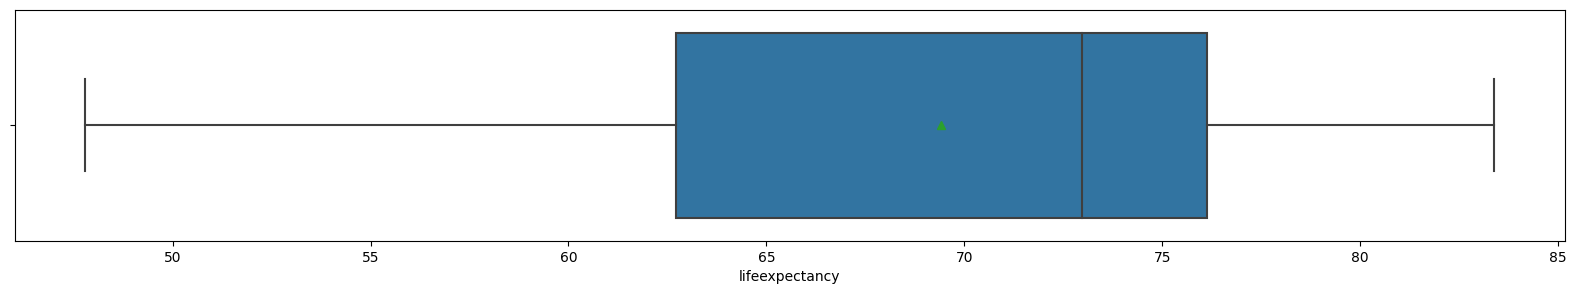

In [294]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=gdp_df['lifeexpectancy'], showmeans=True, orient="h")
plt.show()

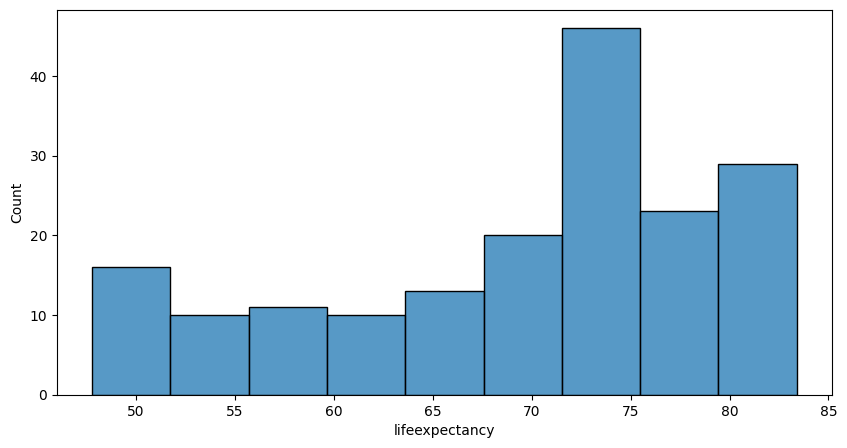

In [295]:
plt.figure(figsize=(10, 5))
sns.histplot(data=gdp_df['lifeexpectancy'])
plt.show()

En este caso, tenemos una distribución bastante sesgada hacia valores mayores, con una media de 69.41 años y una mediana de 72.97 años. Un aspecto interesante de elegir esta variable para el modelo, es que se encuentra en el mismo orden de magnitud que las variables que manejan porcentajes, lo que permitirá calcular coeficientes sin necesidad de realizar demasiadas conversiones o normalizaciones.

### 1.6 Análisis Multivariado

Ahora, evaluaremos la relación entre el comportamiento de las variables para comprobar que podremos entrenar un modelo robusto con esta elección.

Primero, y con la finalidad de encontrar tendencias a nivel de continentes o regiones, vamos a asignarle a cada país del dataset su correspondiente continente y región, acorde a la lista de Grupos Regionales de las Naciones Unidas.

In [296]:
reg_df = pd.read_csv("./data/un_regions.csv")
reg_df.sample(10)

,country,continent,region
169,Senegal,Africa,Sub-Saharan Africa
155,Kenya,Africa,Sub-Saharan Africa
119,Saint Vincent and the Grenadines,America,Central America and the Caribbean
58,Cyprus,Europe,Western Europe
167,Rwanda,Africa,Sub-Saharan Africa
91,Spain,Europe,Western Europe
26,Afghanistan,Asia,Asia
59,Czech Rep.,Europe,Eastern Europe
75,Luxembourg,Europe,Western Europe
137,Burundi,Africa,Sub-Saharan Africa


In [297]:
gdp_reg_df = gdp_df.merge(reg_df,on="country",how="inner")

In [298]:
gdp_reg_df.sample(5)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,continent,region
156,United Arab Emirates,21087.394120,0.52,1.812476,24.1,2.315698e+09,37.299999,NaN,77.996781,76.546,4.299964,-8.0,11154.755030,1.392951,75.199997,77.88,Asia,Middle East
131,Denmark,30532.277040,12.02,1.012373,88.7,3.503878e+09,58.099998,0.2,88.770254,78.826,1.567527,10.0,1884.299342,8.973104,63.099998,86.68,Europe,Western Europe
146,Paraguay,1621.177078,7.91,0.885386,34.4,9.525633e+07,65.300003,0.3,19.801681,72.477,NaN,8.0,528.648051,4.409532,73.099998,60.30,America,South America
37,Gabon,4180.765821,9.46,1.018906,18.2,1.708043e+08,52.599998,5.2,7.232224,62.703,NaN,3.0,537.104738,7.745065,59.000000,85.04,Africa,Sub-Saharan Africa
14,Equatorial Guinea,8654.536845,6.12,0.397654,16.5,2.612500e+07,39.599998,5.0,6.003437,51.088,NaN,-5.0,NaN,10.129350,61.700001,39.38,Africa,Sub-Saharan Africa


Ahora podemos realizar un análisis de correlación entre las variables seleccionadas y el PIB, que es nuestra variable objetivo. De esta forma, podremos inferir desde un punto inicial si existe alguna relación entre las variables. Adicionalmente, convertiremos las variables de continente y region al tipo 'category', con la finalidad de que puedan ser usadas para analizar correlaciones.

In [299]:
gdp_reg_df['continent_cat'] = gdp_reg_df['continent'].astype('category').cat.codes
gdp_reg_df['region_cat'] = gdp_reg_df['region'].astype('category').cat.codes

features_reg = features + ['continent_cat','region_cat']

corr = gdp_reg_df[["incomeperperson"]+ features_reg].corr()

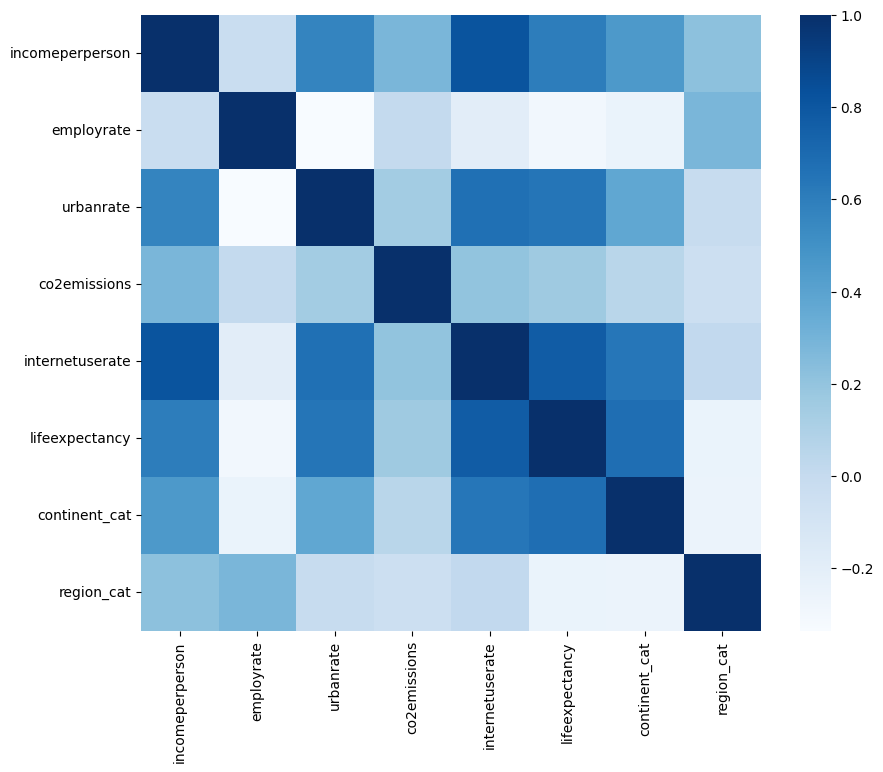

In [300]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="Blues")
plt.show()

En este mapa de calor, se puede evidenciar que el PIB presenta unas correlaciones relativamente altas con el continente y la region, las tasas de urbanidad y de usuarios de internet, y con la expectativa de vida. Después de éstas, se encuentra la correlación con la emisión acumulada de CO<sub>2</sub>, que pronto analizaremos más en detalle. Finalmente, y de forma sorpresiva, la tasa de empleo es la variable menos relacionada entre las elegidas, lo que puede apuntar a que no todos los empleos tienen el mismo impacto sobre el PIB de un país.

C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


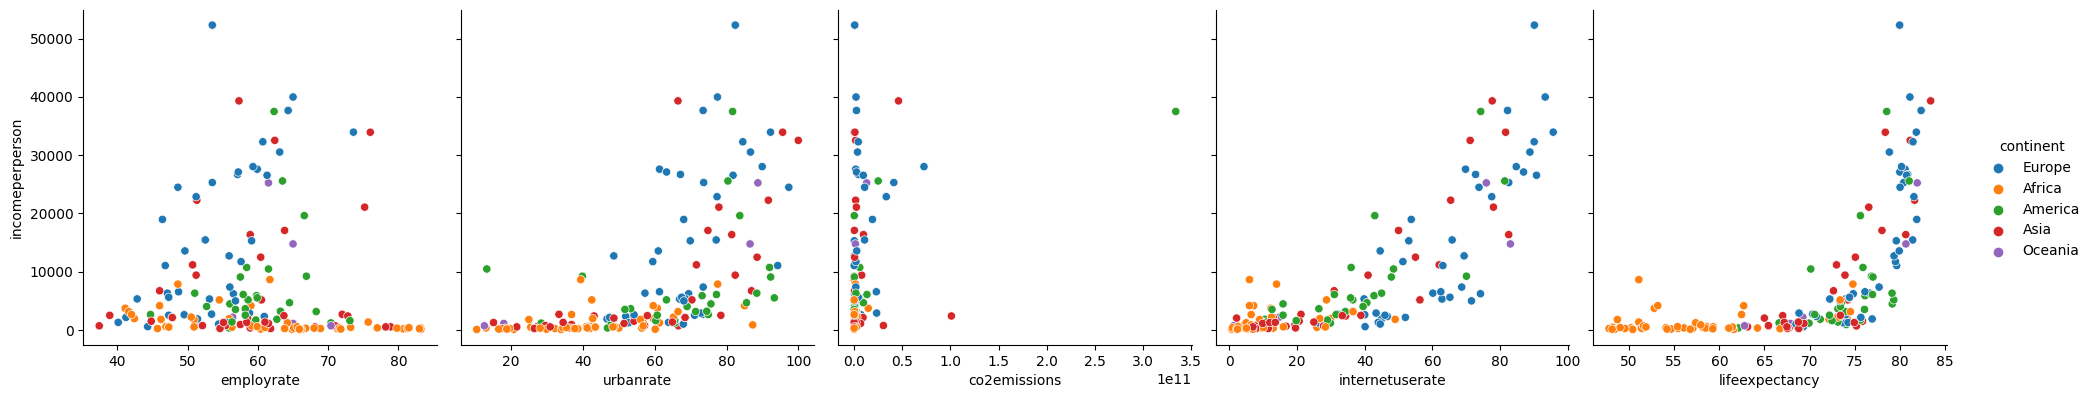

In [301]:
sns.pairplot(gdp_reg_df, height=4, y_vars="incomeperperson", x_vars=features, kind="scatter",hue="continent")
plt.show()

C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


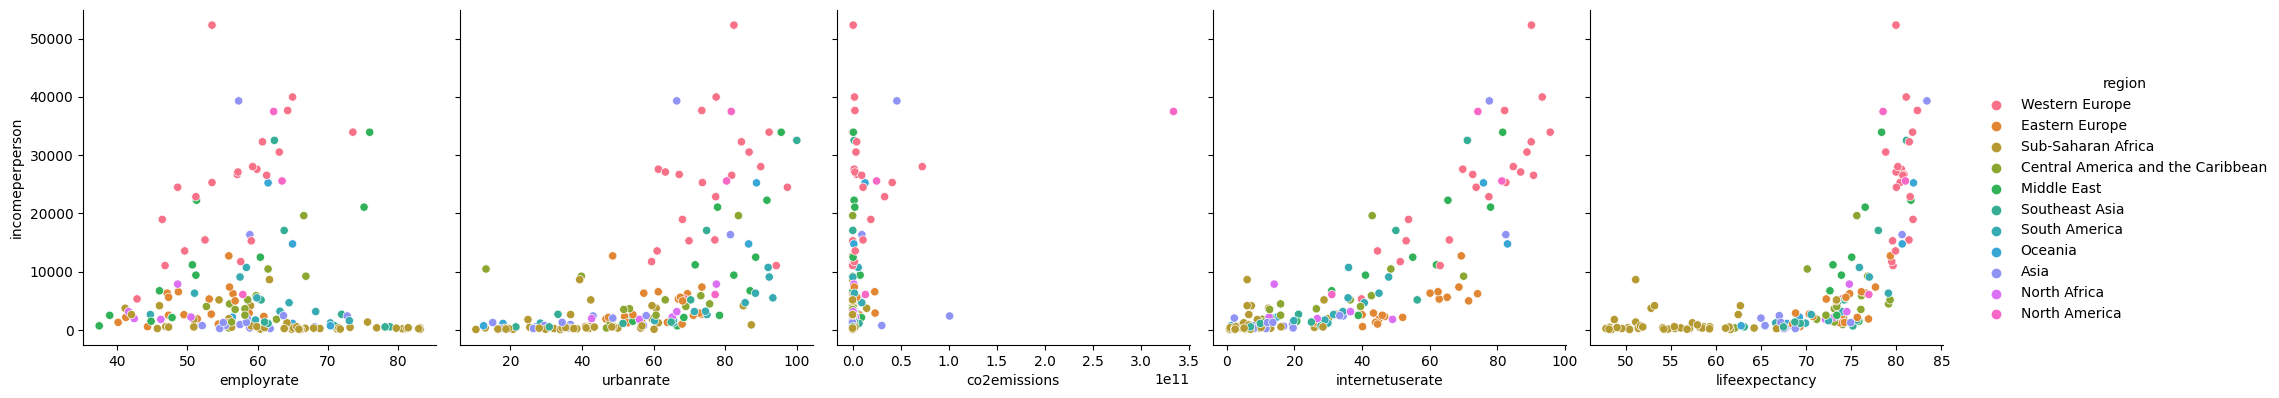

In [302]:
sns.pairplot(gdp_reg_df, height=4, y_vars="incomeperperson", x_vars=features, kind="scatter",hue="region")
plt.show()

En esta gráfica de dispersión se puede evidenciar visualmente las correlaciones calculadas anteriormente. Se puede evidenciar una relación entre la tasa de urbanidad, la tasa de usuarios de internet y la expectativa de vida, e pesar de que esta última parece no tener caracter lineal. 

Las variables categóricas de continente y región se visualizan con los códigos de color. De estas se puede inferir que hay una clara tendencia en la region de Africa Subsahariana hacia los PIB más bajos, mientras que Europa Occidental presenta los PIB más altos.

Para el caso de las emisiones de CO<sub>2</sub>, la relación es mucho menos directa. Pero si dejamos por fuera los outliers más visibles, se puede ver una relación más fuerte.

C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


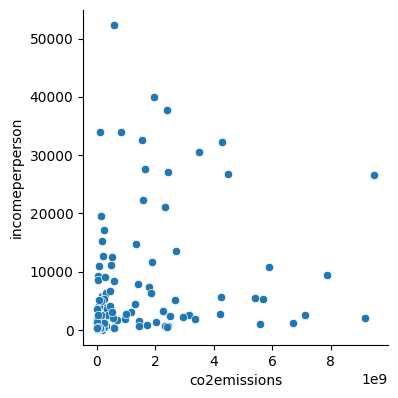

In [303]:
gdp_co2_noout_df = gdp_df.loc[gdp_df["co2emissions"] <= gdp_df["co2emissions"].quantile(.90)]
sns.pairplot(gdp_co2_noout_df, height=4, y_vars="incomeperperson", x_vars="co2emissions", kind="scatter")
plt.show()

Para el caso de la tasa de empleo, es importante ver que hay países que reportan tasas de empleo significativamente altas, pero su PIB es bastante bajo. En la tabla siguiente, se puede observar que la mayoría de estos países se encuentran en la región de Africa Subsahariana, lo que puede alterar los resultados del modelo para países de esta región.

In [304]:
gdp_reg_emp_outliers_df = gdp_reg_df.loc[gdp_reg_df["employrate"] >= gdp_reg_df["employrate"].quantile(.90)]
gdp_reg_emp_outliers_df.sort_values(by=["employrate"],ascending=False)[['country','continent','region','employrate']]

,country,continent,region,employrate
35,Uganda,Africa,Sub-Saharan Africa,83.199997
79,Burundi,Africa,Sub-Saharan Africa,83.199997
94,Madagascar,Africa,Sub-Saharan Africa,83.000000
130,Guinea,Africa,Sub-Saharan Africa,81.500000
84,Burkina Faso,Africa,Sub-Saharan Africa,81.300003
66,Ethiopia,Africa,Sub-Saharan Africa,80.699997
77,Rwanda,Africa,Sub-Saharan Africa,79.800003
41,Cambodia,Asia,Southeast Asia,78.900002
11,Tanzania,Africa,Sub-Saharan Africa,78.199997
166,Laos,Asia,Southeast Asia,78.199997


## 2. Preparación de Datos

### 2.1 Valores nulos

Primero, debemos determinar si alguna de las variables que hemos elegido para nuestro análisis contiene algún valor nulo o vacío. Estos pueden generar errores en el entrenamiento del modelo, por lo que se debe tomar una decisión sobre imputar datos faltantes, o remover los países con valores faltantes. Para esto, primero calculamos la proporción de datos para cada métrica que tienen valores nulos:

In [305]:
gdp_reg_df[['continent','region','incomeperperson'] + features_reg].isnull().sum() / gdp_reg_df.shape[0]

continent          0.000000
region             0.000000
incomeperperson    0.017341
employrate         0.005780
urbanrate          0.000000
co2emissions       0.011561
internetuserate    0.023121
lifeexpectancy     0.000000
continent_cat      0.000000
region_cat         0.000000
dtype: float64

Dado que los valores son considerablemente pequeños, podemos remover estos países sin alterar demasiado el dataset.

In [306]:
gdp_reg_df = gdp_reg_df.dropna(subset=["incomeperperson"]+features)
gdp_reg_df.shape

(164, 20)

Luego, debemos descubrir si existen valores duplicados para algún país, que deben ser removidos para eliminar la posibildad de sobre-entrenar el modelo para valores cercanos al PIB de estos países.

In [307]:
gdp_reg_dupes = gdp_reg_df[gdp_reg_df.duplicated('country',keep=False)]
gdp_reg_dupes.shape

(20, 20)

In [323]:
gdp_reg_df = gdp_reg_df.drop_duplicates(keep='first')
gdp_reg_df.shape

(154, 20)

Finalmente, con la finalidad de utilizar las variables categóricas de continente y región en nuestro modelo, utilizaremos el método de One-Hot Encoding para convertir las categorías en features binarios para cada posible categoria. Con estos valores binarios, es más directa la interpretación de los coeficientes asociados a cada región, y para cada país solo será válido un coeficiente de continente y uno de región.

In [344]:
gdp_reg_final = pd.get_dummies(gdp_reg_df,columns=['continent','region'],dtype=int)
gdp_reg_final[['country','continent_America','continent_Europe','continent_Africa','continent_Asia','continent_Oceania']].sample(10)

,country,continent_America,continent_Europe,continent_Africa,continent_Asia,continent_Oceania
15,Guatemala,1,0,0,0,0
119,Iran,0,0,0,1,0
97,Benin,0,0,1,0,0
68,Israel,0,0,0,1,0
66,Ethiopia,0,0,1,0,0
11,Tanzania,0,0,1,0,0
124,New Zealand,0,0,0,0,1
108,Ukraine,0,1,0,0,0
20,Panama,1,0,0,0,0
19,Kenya,0,0,1,0,0


In [327]:
gdp_reg_final[['country','region_Middle East','region_Sub-Saharan Africa']].sample(10)

,country,region_Middle East,region_Sub-Saharan Africa
29,Saudi Arabia,1,0
156,United Arab Emirates,1,0
119,Iran,1,0
65,Guyana,0,0
163,El Salvador,0,0
33,Cape Verde,0,1
104,Egypt,0,0
51,Moldova,0,0
142,Liberia,0,1
19,Kenya,0,1


Para considerar esta nueva codificación de las variables categóricas, debemos modificar una vez más nuestro vector de features a ser usado en el entrenamiento del modelo:

In [359]:
feats_final = ['employrate','urbanrate','co2emissions','internetuserate','lifeexpectancy','continent_Africa', 'continent_America', 'continent_Asia', 'continent_Europe', 
               'continent_Oceania', 'region_Asia', 'region_Central America and the Caribbean', 'region_Eastern Europe', 'region_Middle East', 'region_North Africa', 
               'region_North America', 'region_Oceania', 'region_South America', 'region_Southeast Asia', 'region_Sub-Saharan Africa', 'region_Western Europe']

## III. Entrenamiento del Modelo de Regresión

En esta sección, entrenaremos el modelo de regresión lineal que nos permitirá identificar el impacto de cada una de las variables elegidas sobre el PIB proyectado de un país.

### III.1 Entrenamiento de modelo

Antes de entrenar el modelo, se debe realizar la partición entre segmentos de entrenamiento y de prueba. Luego, podemos ajustar el modelo de regresión lineal al tamaño del segmento de entrenamiento

In [360]:
x_train, x_test, y_train, y_test = train_test_split(gdp_reg_final[feats_final], gdp_reg_final["incomeperperson"], test_size=0.3, random_state=1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(107, 21) (107,)
(47, 21) (47,)


In [361]:
rgrs_mdl = LinearRegression()
rgrs_mdl.fit(x_train, y_train)
pd.DataFrame({"feature":feats_final,"coefficient":rgrs_mdl.coef_})

,feature,coefficient
0,employrate,1.343537e+02
1,urbanrate,7.731486e+01
2,co2emissions,9.658782e-08
3,internetuserate,2.268118e+02
4,lifeexpectancy,1.100363e+02
5,continent_Africa,2.132680e+03
6,continent_America,-3.710689e+03
7,continent_Asia,1.475649e+03
8,continent_Europe,2.101903e+02
9,continent_Oceania,-1.078305e+02


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

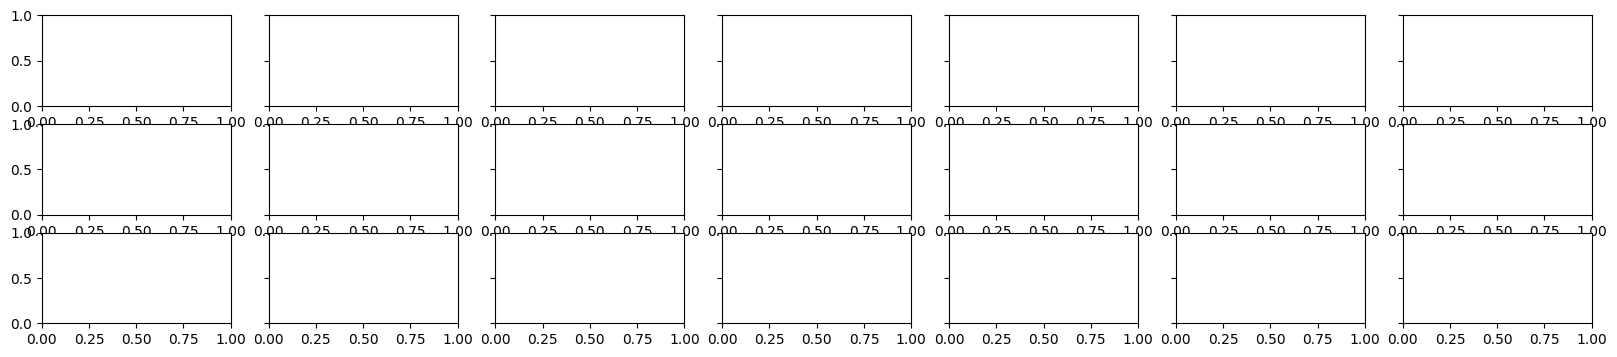

In [375]:
f, axs = plt.subplots(3, len(feats_final)//7, sharey=True, figsize=(20, 4))

for i in range(3):
    for j in range(7):
        col = feats_final[i+j]
        x = x_train[col]
        m = rgrs_mdl.coef_[i+j]
        b = rgrs_mdl.intercept_

        axs[i+j].plot(x, y_train, "o", alpha=0.1)
        axs[i+j].plot(x, x * m + b)
        axs[i+j].set_title(col)

### III.2 Validación de supuestos

### III.3 Interpretación de coeficientes

## IV. Generación de Resultados